In [5]:
import sqlite3
import pandas as pd
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
data_dir = "E:/DS6050-SolarFlare/solar_flare.db"
# data_dir = "./solar_flare.db"

In [7]:
con = sqlite3.connect(data_dir)
cur = con.cursor()

In [8]:
flare_data = []
for row in cur.execute('SELECT * FROM flares'):
    flare_data.append(row)

In [9]:
len(flare_data)

214740

In [10]:
columns = list(map(lambda x: x[0], cur.description))

In [11]:
flares_data = pd.DataFrame(flare_data, columns=columns)
flares_data.head()

index            Timestamp      TOTUSJH        TOTBSQ        TOTPOT  \
0      0  2015-03-14 09:24:00  3053.027399  3.409889e+10  6.918123e+23   
1      1  2015-03-14 09:36:00  3055.748990  3.412824e+10  6.951034e+23   
2      2  2015-03-14 09:48:00  3106.621119  3.414582e+10  6.964391e+23   
3      3  2015-03-14 10:00:00  3062.527456  3.403375e+10  6.969886e+23   
4      4  2015-03-14 10:12:00  3062.468265  3.394193e+10  6.951131e+23   

        TOTUSJZ      ABSNJZH       SAVNCPP        USFLUX         TOTFZ  ...  \
0  4.603176e+13  1598.566070  4.930708e+13  2.343756e+22 -3.729736e+24  ...   
1  4.643438e+13  1606.606998  5.247000e+13  2.352953e+22 -3.586738e+24  ...   
2  4.693594e+13  1589.367379  5.120651e+13  2.351925e+22 -3.548442e+24  ...   
3  4.702157e+13  1597.128803  5.222123e+13  2.359761e+22 -3.410476e+24  ...   
4  4.704003e+13  1574.773616  5.116863e+13  2.361854e+22 -3.453983e+24  ...   

   BFLARE_LABEL_LOC  CFLARE_LOC  CFLARE_LABEL_LOC  MFLARE_LOC  \
0              None         0.0              None         0.0   
1              None         0.0              None         0.0   
2              None         0.0              None         0.0   
3              None         0.0              None         0.0   
4              None         0.0              None         0.0   

   MFLARE_LABEL_LOC  XFLARE_LOC  XFLARE_LABEL_LOC    XR_MAX  XR_QUAL  IS_TMFI  
0              None         0.0              None  0.000002       12        1  
1              None         0.0              None  0.000002       12        1  
2              None         0.0              None  0.000001       12        1  
3              None         0.0              None  0.000001       12        1  
4              None         0.0              None  0.000001       12        1  

[5 rows x 56 columns]

In [12]:
flares_data.describe()

index        TOTUSJH        TOTBSQ        TOTPOT       TOTUSJZ  \
count  214740.000000  213761.000000  2.137610e+05  2.137610e+05  2.137610e+05   
mean       29.500000    3847.057691  5.689786e+10  1.077415e+24  7.061208e+13   
std        17.318143    2847.119133  5.000605e+10  1.103613e+24  4.813006e+13   
min         0.000000     237.464273  1.819889e+09  1.987425e+22  5.204836e+12   
25%        14.750000    2058.661580  2.529200e+10  3.834652e+23  4.021721e+13   
50%        29.500000    2947.215557  4.032329e+10  7.082231e+23  5.676542e+13   
75%        44.250000    4621.431490  7.110275e+10  1.318020e+24  8.501660e+13   
max        59.000000   14339.426366  2.547652e+11  5.384169e+24  2.423428e+14   

             ABSNJZH       SAVNCPP        USFLUX         TOTFZ        MEANPOT  \
count  213761.000000  2.137610e+05  2.137610e+05  2.137610e+05  213761.000000   
mean      544.475360  2.013743e+13  4.771086e+22 -1.390827e+25   10523.251596   
std       567.471337  1.839255e+13  3.609880e+22  1.138505e+25    4659.134836   
min         0.014655  1.708205e+10  2.145068e+21 -7.793319e+25     794.041386   
25%       157.436099  6.939840e+12  2.455929e+22 -1.913274e+25    6885.668828   
50%       362.708193  1.444439e+13  3.578709e+22 -1.010929e+25    9940.051455   
75%       744.398803  2.800378e+13  5.994219e+22 -6.429046e+24   13747.447947   
max      4084.210835  1.085462e+14  2.077737e+23  3.770667e+24   25556.997616   

       ...         CFLARE         MFLARE         XFLARE     BFLARE_LOC  \
count  ...  214740.000000  214740.000000  214740.000000  214740.000000   
mean   ...       0.035229       0.007311       0.000545       0.004070   
std    ...       0.185265       0.085192       0.023336       0.064539   
min    ...       0.000000       0.000000       0.000000       0.000000   
25%    ...       0.000000       0.000000       0.000000       0.000000   
50%    ...       0.000000       0.000000       0.000000       0.000000   
75%    ...       0.000000       0.000000       0.000000       0.000000   
max    ...       2.000000       1.000000       1.000000       2.000000   

          CFLARE_LOC     MFLARE_LOC     XFLARE_LOC        XR_MAX  \
count  214740.000000  214740.000000  214740.000000  2.147400e+05   
mean        0.034712       0.007311       0.000545 -7.432169e+02   
std         0.183963       0.085192       0.023336  8.588884e+03   
min         0.000000       0.000000       0.000000 -9.999900e+04   
25%         0.000000       0.000000       0.000000  7.972100e-07   
50%         0.000000       0.000000       0.000000  1.253900e-06   
75%         0.000000       0.000000       0.000000  2.130900e-06   
max         2.000000       1.000000       1.000000  9.329300e-04   

             XR_QUAL        IS_TMFI  
count  214740.000000  214740.000000  
mean       11.882132       0.953409  
std         1.114296       0.210762  
min         0.000000       0.000000  
25%        12.000000       1.000000  
50%        12.000000       1.000000  
75%        12.000000       1.000000  
max        12.000000       1.000000  

[8 rows x 47 columns]

In [13]:
flares_data.dtypes

index                 int64
Timestamp            object
TOTUSJH             float64
TOTBSQ              float64
TOTPOT              float64
TOTUSJZ             float64
ABSNJZH             float64
SAVNCPP             float64
USFLUX              float64
TOTFZ               float64
MEANPOT             float64
EPSZ                float64
MEANSHR             float64
SHRGT45             float64
MEANGAM             float64
MEANGBT             float64
MEANGBZ             float64
MEANGBH             float64
MEANJZH             float64
TOTFY               float64
MEANJZD             float64
MEANALP             float64
TOTFX               float64
EPSY                float64
EPSX                float64
R_VALUE             float64
CRVAL1              float64
CRLN_OBS            float64
CRLT_OBS            float64
CRVAL2              float64
HC_ANGLE            float64
SPEI                  int64
LAT_MIN             float64
LON_MIN             float64
LAT_MAX             float64
LON_MAX             

## Description of Magnetic Field Parameters

24 out of 56 variables are magnetic field parameters.

* ABSNJZH: Absolute value of the net current helicity in G2/m
* EPSX: Sum of X-component of normalized Lorentz force
* EPSY: Sum of Y-component of normalized Lorentz force
* EPSZ: Sum of Z-component of normalized Lorentz force
* MEANALP: Mean twist parameter
* MEANGAM: Mean inclination angle
* MEANGBH: Mean value of the horizontal field gradient
* MEANGBT: Mean value of the total field gradient
* MEANGBZ: Mean value of the vertical field gradient
* MEANJZD: Mean vertical current density
* MEANJZH: Mean current helicity
* MEANPOT: Mean photospheric excess magnetic energy density
* MEANSHR: Mean Shear angle
* R_VALUE: Total unsigned flux around high gradient polarity inversion lines using Blos component
* SAVNCPP: Sum of the absolute value of the net current per polarity
* SHRGT45: Area with shear angle greater than 45 degrees
* TOTBSQ: Total magnitude of Lorentz force
* TOTFX: Sum of X-component of Lorentz force
* TOTFY: Sum of Y-component of Lorentz force
* TOTFZ: Sum of Z-component of Lorentz force
* TOTPOT: Total photospheric magnetic energ density
* TOTUSJH: Total unsigned current helivity
* TOTUSJZ: Total unsigned vertical current
* USFLUX: Total unsigned flux of Maxwells

# To-Do
Propose doing the data cleaning and preparation concurrently to ensure we are efficiently using all of our time.

## Data Cleaning/Preparation
1. Convert Timestamp to datetime format
2. Check for continuous Timestamps (should be every 12 seconds)
   - If there are discontinous times, that data may be found in the non-flares table in SQL
3. Once we have continuous spans of data, need to normalize and window the data

### Convert Timestamp

In [14]:
flares_data["Timestamp"] = pd.to_datetime(flares_data["Timestamp"], format="%Y-%m-%d %H:%M:%S")

In [15]:
flares_data.sort_values(by="Timestamp", inplace=True)

In [16]:
test = flares_data.loc[flares_data["Timestamp"] == "2013-10-22 14:00:00"]

for column in test.columns:
    if test.loc[:,column].iloc[0] == test.loc[:,column].iloc[1]:
        print(f"{column} column contains the same data for both rows...")
    else:
        print(f"{column} column data is different...")

index column data is different...
Timestamp column contains the same data for both rows...
TOTUSJH column contains the same data for both rows...
TOTBSQ column contains the same data for both rows...
TOTPOT column contains the same data for both rows...
TOTUSJZ column contains the same data for both rows...
ABSNJZH column contains the same data for both rows...
SAVNCPP column contains the same data for both rows...
USFLUX column contains the same data for both rows...
TOTFZ column contains the same data for both rows...
MEANPOT column contains the same data for both rows...
EPSZ column contains the same data for both rows...
MEANSHR column contains the same data for both rows...
SHRGT45 column contains the same data for both rows...
MEANGAM column contains the same data for both rows...
MEANGBT column contains the same data for both rows...
MEANGBZ column contains the same data for both rows...
MEANGBH column contains the same data for both rows...
MEANJZH column contains the same data

In [17]:
# Remove index column
flares_data = flares_data.drop("index", axis=1)
flares_data.head()

Timestamp      TOTUSJH        TOTBSQ        TOTPOT  \
193020 2013-10-22 13:00:00  2387.829011  4.165376e+10  7.788877e+23   
193021 2013-10-22 13:12:00  2366.758849  4.160051e+10  7.791078e+23   
193022 2013-10-22 13:24:00  2383.389072  4.165095e+10  7.808088e+23   
193023 2013-10-22 13:36:00  2396.991954  4.176107e+10  7.833066e+23   
193024 2013-10-22 13:48:00  2439.179219  4.181367e+10  7.830056e+23   

             TOTUSJZ     ABSNJZH       SAVNCPP        USFLUX         TOTFZ  \
193020  4.726840e+13  555.531394  2.032108e+13  3.486114e+22 -1.061485e+25   
193021  4.711841e+13  564.539024  2.169806e+13  3.465539e+22 -1.050578e+25   
193022  4.704261e+13  571.158889  2.166113e+13  3.458485e+22 -1.044615e+25   
193023  4.739485e+13  585.576122  1.971725e+13  3.456694e+22 -1.046725e+25   
193024  4.831919e+13  603.161591  2.191639e+13  3.454828e+22 -1.056869e+25   

             MEANPOT  ...  BFLARE_LABEL_LOC  CFLARE_LOC  CFLARE_LABEL_LOC  \
193020  11329.679818  ...              None         0.0              None   
193021  11397.171741  ...              None         0.0              None   
193022  11426.274371  ...              None         0.0              None   
193023  11544.039663  ...              None         0.0              None   
193024  11557.248590  ...              None         0.0              None   

        MFLARE_LOC  MFLARE_LABEL_LOC  XFLARE_LOC  XFLARE_LABEL_LOC  \
193020         0.0              None         0.0              None   
193021         0.0              None         0.0              None   
193022         0.0              None         0.0              None   
193023         0.0              None         0.0              None   
193024         0.0              None         0.0              None   

              XR_MAX  XR_QUAL  IS_TMFI  
193020  1.409600e-06       12        1  
193021  8.295700e-07       12        1  
193022  1.769600e-06       12        1  
193023  1.857400e-06       12        1  
193024  1.185900e-06       12        1  

[5 rows x 55 columns]

In [18]:
test_before = flares_data["Timestamp"].iloc[0]
test_after = test_before + timedelta(minutes=12)
print(test_before)
print(test_after)
test_after = str(test_after)
print(test_after)
print(type(test_after))

2013-10-22 13:00:00
2013-10-22 13:12:00
2013-10-22 13:12:00
<class 'str'>


### Duplicates

In [19]:
dup_df = flares_data.groupby(flares_data.columns.tolist(),as_index=False).size()
dup_df[dup_df['size'] > 1].shape[0]

24907

In [20]:
flares_data = flares_data.drop_duplicates()

In [21]:
dup_df = flares_data.groupby(flares_data.columns.tolist(),as_index=False).size()
dup_df[dup_df['size'] > 1].shape[0]

0

## Quality Investigation

In [19]:
flares_data.shape

(26770, 55)

Text(0, 0.5, 'Sample Number')

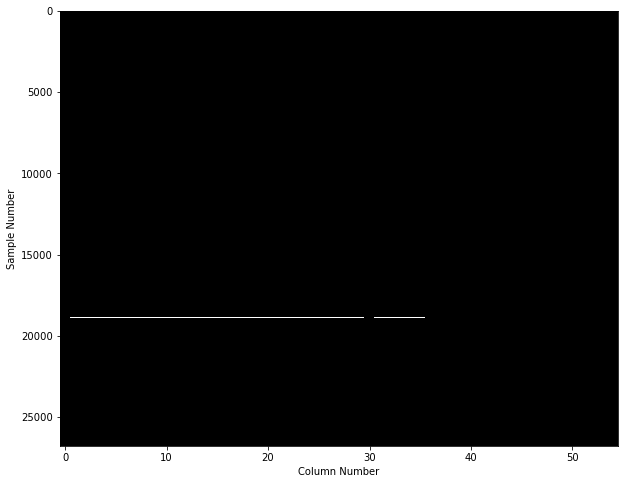

In [20]:
plt.figure(figsize=(10,8))
plt.imshow(flares_data.isna(),
           aspect = 'auto',
           interpolation = 'nearest',
           cmap = 'gray')
plt.xlabel('Column Number')
plt.ylabel('Sample Number')

This figure shows on the y-axis each of the 360'000 individual samples, and on the x-axis if any of the 67 features contains a missing value.

<AxesSubplot:>

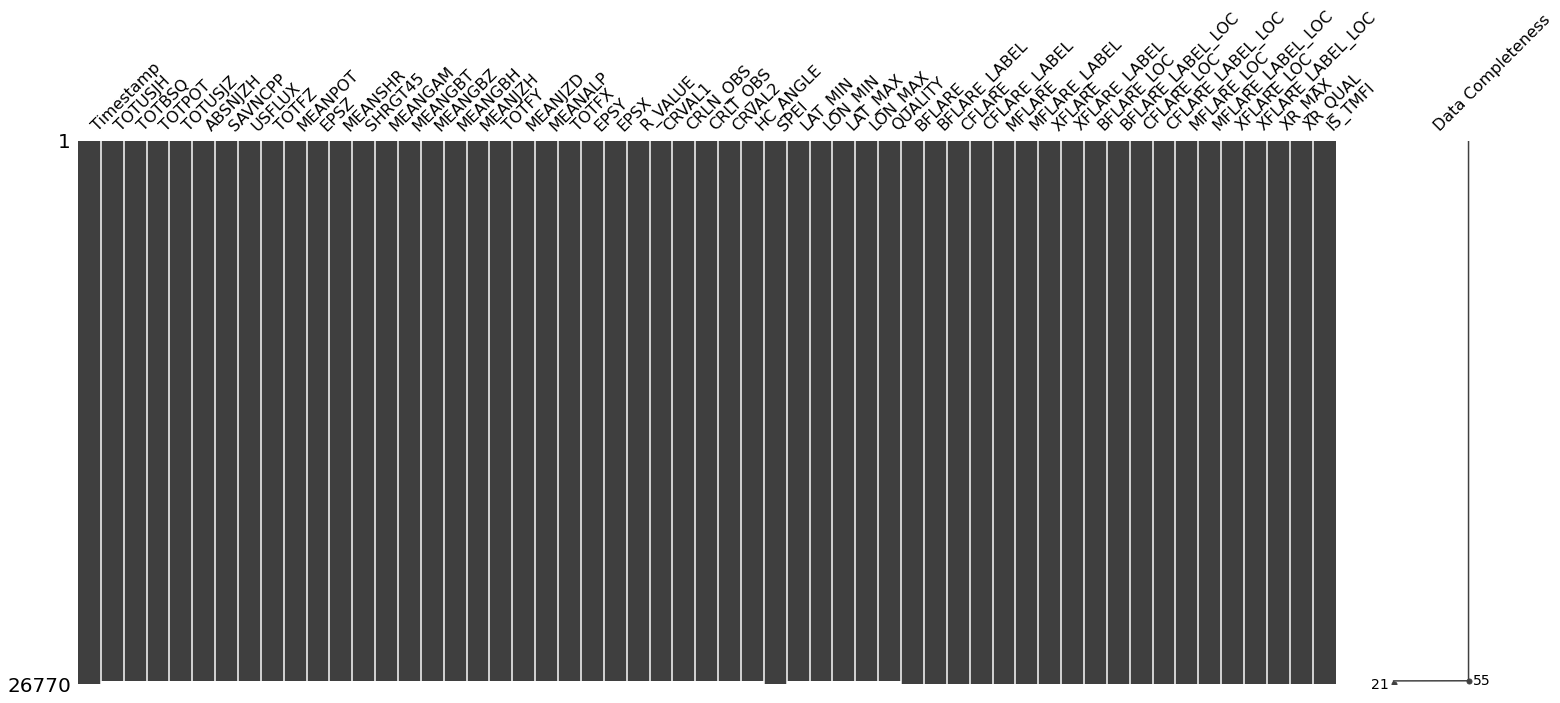

In [21]:
import missingno as msno

msno.matrix(flares_data,
           labels = True,
           sort = 'descending')

In [22]:
# flares_data = flares_data.dropna(thresh = flares_data.shape[1] * 0.8,
#                                  axis = 0).reset_index(drop = True)
# flares_data.shape

### Missing Values Per Feature

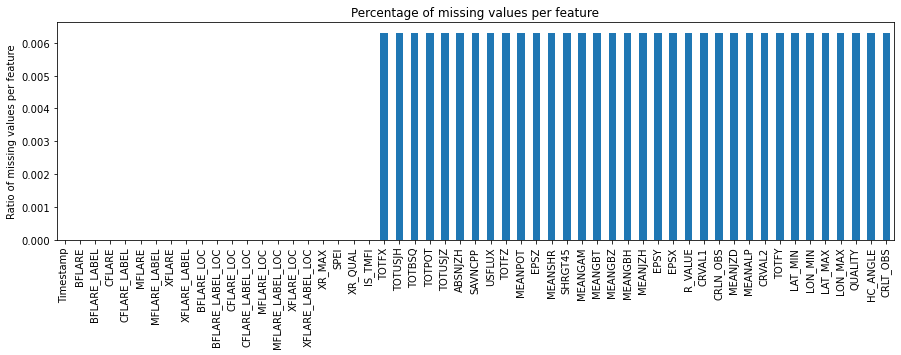

In [23]:
flares_data.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

In [24]:
# flares_data = flares_data.dropna(thresh=flares_data.shape[0] * 0.85, axis=1)
# flares_data.shape

## EDA

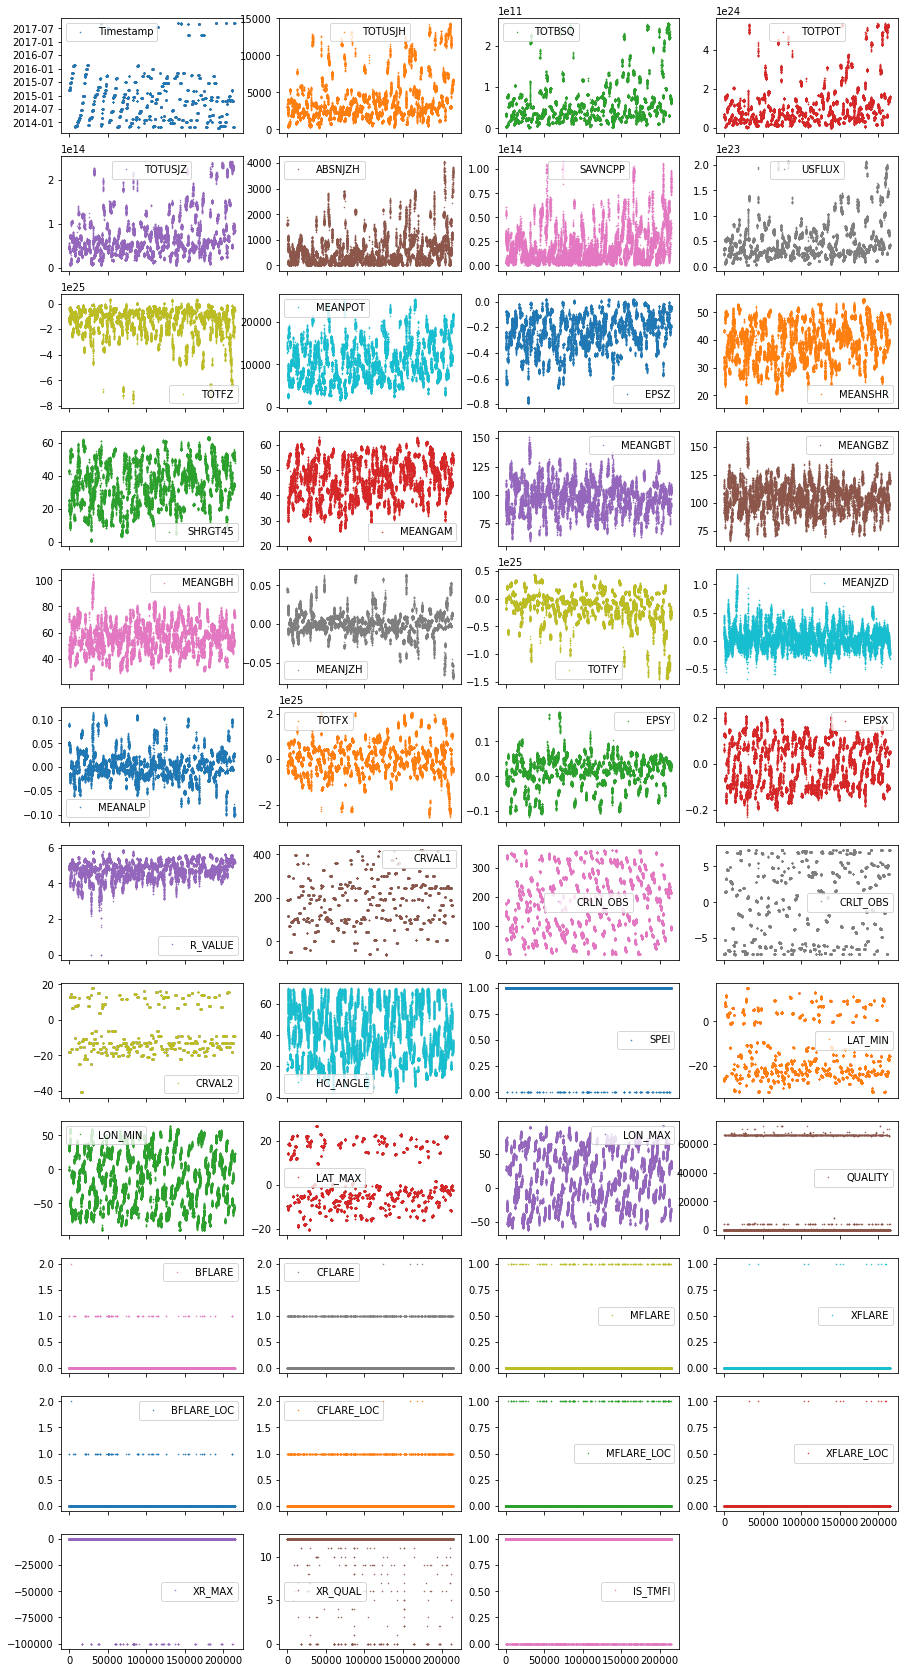

In [25]:
flares_data.plot(lw=0, 
                 marker=".", 
                 subplots=True, 
                 layout=(-1, 4),
                 figsize=(15, 30), 
                 markersize=1);

## Content Investigation

### Feature Distribution

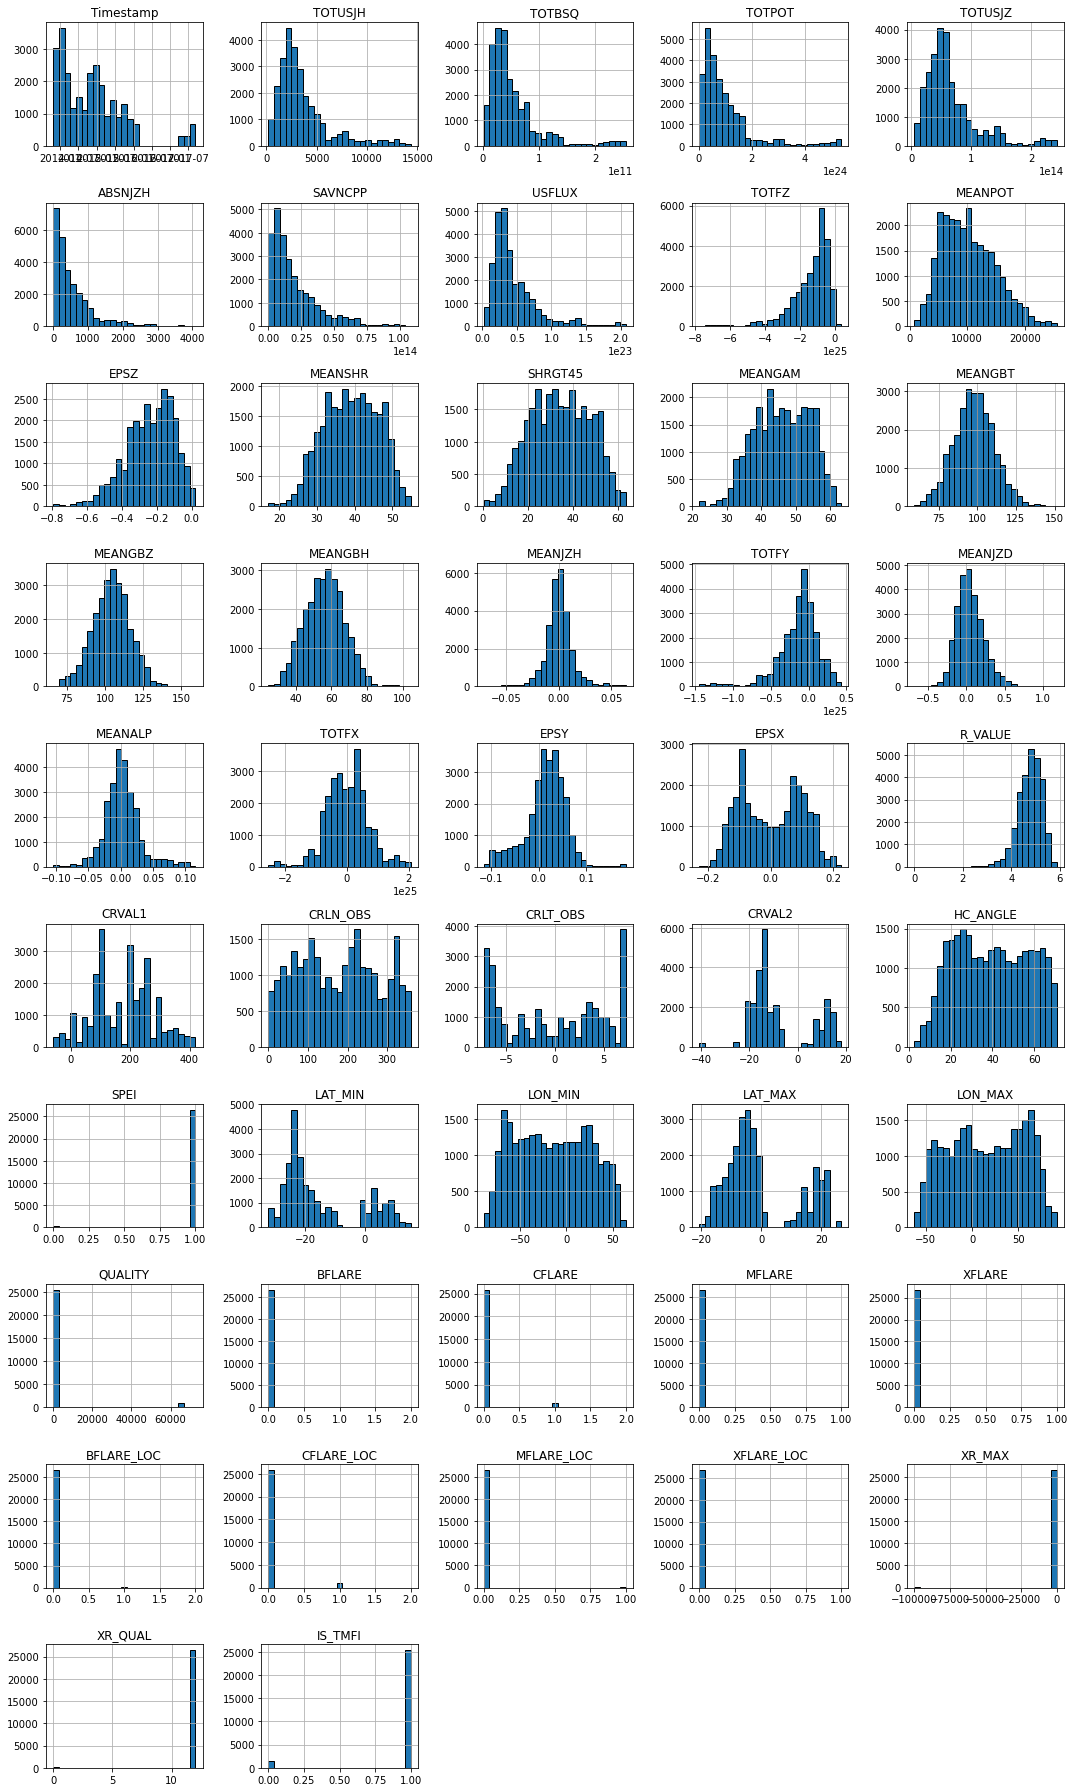

In [26]:
flares_data.hist(bins=25, figsize=(15, 25), layout=(-1, 5), edgecolor="black")
plt.tight_layout();

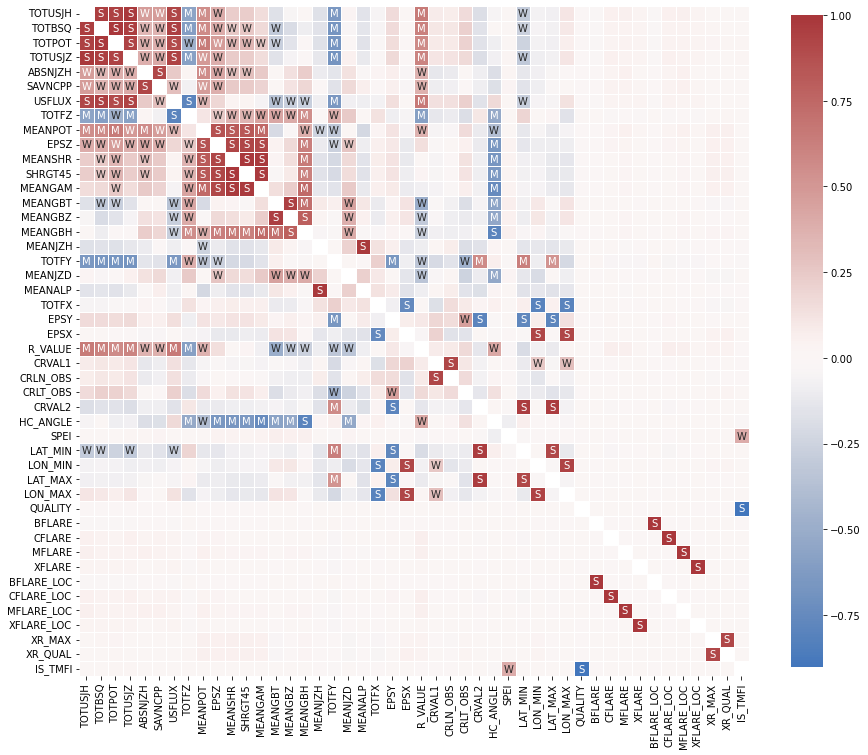

In [27]:
flares_data_corr = flares_data.corr(method="pearson")

# Create labels for the correlation matrix
labels = np.where(np.abs(flares_data_corr)>0.75, "S",
                  np.where(np.abs(flares_data_corr)>0.5, "M",
                           np.where(np.abs(flares_data_corr)>0.25, "W", "")))

# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(flares_data_corr, mask=np.eye(len(flares_data_corr)), square=True,
            center=0, annot=labels, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

# To-Do
Propose doing the data cleaning and preparation concurrently to ensure we are efficiently using all of our time.

## Build Modeling Framework
1. Build tuning into our model (may or may not use it depending on run time)
2. Build pipeline to speed up future model iterations (like when we implement PCA)
3. Build code to compare regular PCA (linear) and KernelPCA (non-linear) on parameters
   - Since normalization is included in data cleaning, assume data will need to be provided standardized

### Create Continuous Dataset

In [22]:
flares_data.sort_values(by="Timestamp", inplace=True)

In [23]:
# List of tuples where the first item of the tuple is
# the beginning index and the second item is the ending
# index of a continuous timeframe of data
continuous_range = []

for i in range(len(flares_data)-2):
    if i == 0:
        datetime_end = flares_data.loc[:,"Timestamp"].iloc[i+1]
        #print(datetime_end)
        datetime_start = flares_data.loc[:,"Timestamp"].iloc[i]
        #print(datetime_start)
        minutes_diff = (datetime_end - datetime_start).total_seconds() / 60.0
        #print(minutes_diff)
        if minutes_diff == 12:
            j = i + 1
            while minutes_diff == 12:
                datetime_end = flares_data.loc[:,"Timestamp"].iloc[j+1]
                datetime_start2 = flares_data.loc[:,"Timestamp"].iloc[j]
                minutes_diff = (datetime_end - datetime_start2).total_seconds() / 60.0
                j += 1
            continuous_range.append((i, j-1))
    elif i >= continuous_range[-1][1]:
        #print(i)
        datetime_end = flares_data.loc[:,"Timestamp"].iloc[i+1]
        #print(datetime_end)
        datetime_start = flares_data.loc[:,"Timestamp"].iloc[i]
        #print(datetime_start)
        minutes_diff = (datetime_end - datetime_start).total_seconds() / 60.0
        #print(minutes_diff)
        if minutes_diff == 12:
            j = i + 1
            while minutes_diff == 12 and (j+1) < (len(flares_data)-2):
                #print(j)
                datetime_end = flares_data.loc[:,"Timestamp"].iloc[j+1]
                datetime_start2 = flares_data.loc[:,"Timestamp"].iloc[j]
                minutes_diff = (datetime_end - datetime_start2).total_seconds() / 60.0
                j += 1
            continuous_range.append((i, j-1))

In [24]:
len(continuous_range)

2974

In [25]:
good_range = []
bad_range = []
best_range = []

for i, item in enumerate(continuous_range):
    len_range = item[1]-item[0]
    if len_range >= 120:
        if len_range % 120 == 0:
            best_range.append(i)
        else:
            good_range.append((i, len_range))
    else:
        bad_range.append(i)

In [26]:
print(len(good_range))
print(len(bad_range))
print(len(best_range))

69
2904
1


In [27]:
continuous_range[best_range[0]]

(21169, 21289)

In [28]:
good_range

[(0, 174),
 (1, 154),
 (159, 344),
 (160, 344),
 (313, 174),
 (314, 174),
 (358, 252),
 (359, 129),
 (360, 219),
 (361, 174),
 (538, 174),
 (539, 279),
 (540, 174),
 (682, 149),
 (1183, 231),
 (1327, 344),
 (1328, 219),
 (1329, 124),
 (1330, 159),
 (1331, 174),
 (1436, 264),
 (1508, 139),
 (1509, 174),
 (1510, 174),
 (1513, 184),
 (1514, 174),
 (1515, 174),
 (1516, 174),
 (1517, 190),
 (1692, 174),
 (1693, 154),
 (1694, 134),
 (1696, 294),
 (1737, 160),
 (1744, 174),
 (1745, 249),
 (1746, 144),
 (1748, 649),
 (1749, 569),
 (1750, 249),
 (1751, 174),
 (1752, 249),
 (1753, 174),
 (1754, 319),
 (1755, 174),
 (2058, 141),
 (2235, 324),
 (2236, 134),
 (2237, 424),
 (2305, 174),
 (2306, 174),
 (2317, 174),
 (2494, 189),
 (2496, 174),
 (2497, 135),
 (2693, 174),
 (2695, 234),
 (2696, 614),
 (2701, 174),
 (2877, 445),
 (2878, 134),
 (2879, 169),
 (2958, 174),
 (2959, 174),
 (2960, 154),
 (2961, 534),
 (2962, 319),
 (2963, 174),
 (2964, 139)]

In [29]:
# Now need to search through the SQL database for missing data
test_start = continuous_range[0][1]
test_end = continuous_range[1][0]
test_series = flares_data.iloc[test_start:test_end+1, 0]
test_series

194459   2013-10-23 23:48:00
109020   2013-10-25 12:48:00
Name: Timestamp, dtype: datetime64[ns]

In [30]:
(test_series.iloc[1] - test_series.iloc[0]).total_seconds() / 60 / 12

185.0

In [31]:
missing_data = []

search = test_series.iloc[1] + timedelta(minutes=12)
print(search)

query = f"SELECT * FROM nonFlares WHERE Timestamp = '{str(search)}'"
print(query)

for row in cur.execute(query):
    missing_data.append(row)

2013-10-25 13:00:00
SELECT * FROM nonFlares WHERE Timestamp = '2013-10-25 13:00:00'


In [32]:
# missing_data[0]

In [33]:
all_missing_times = []

for i, item in enumerate(continuous_range[:-1]):
    start_time = flares_data["Timestamp"].iloc[item[1]]
    end_time = flares_data["Timestamp"].iloc[continuous_range[i+1][0]]
    num_missing_rows = int((end_time - start_time).total_seconds() / 60 / 12)
    
    for j in range(1, num_missing_rows+1):
        minutes_to_add = j * 12
        missing_timestamp = start_time + timedelta(minutes=minutes_to_add)
        if missing_timestamp != end_time:
            all_missing_times.append(str(missing_timestamp))        

In [34]:
len(all_missing_times)

146170

In [35]:
str_missing_tuple = tuple(all_missing_times)
# str_missing_tuple

In [36]:
query = f"SELECT * FROM nonFlares WHERE Timestamp IN {str_missing_tuple}"
query

"SELECT * FROM nonFlares WHERE Timestamp IN ('2013-10-24 00:00:00', '2013-10-24 00:12:00', '2013-10-24 00:24:00', '2013-10-24 00:36:00', '2013-10-24 00:48:00', '2013-10-24 01:00:00', '2013-10-24 01:12:00', '2013-10-24 01:24:00', '2013-10-24 01:36:00', '2013-10-24 01:48:00', '2013-10-24 02:00:00', '2013-10-24 02:12:00', '2013-10-24 02:24:00', '2013-10-24 02:36:00', '2013-10-24 02:48:00', '2013-10-24 03:00:00', '2013-10-24 03:12:00', '2013-10-24 03:24:00', '2013-10-24 03:36:00', '2013-10-24 03:48:00', '2013-10-24 04:00:00', '2013-10-24 04:12:00', '2013-10-24 04:24:00', '2013-10-24 04:36:00', '2013-10-24 04:48:00', '2013-10-24 05:00:00', '2013-10-24 05:12:00', '2013-10-24 05:24:00', '2013-10-24 05:36:00', '2013-10-24 05:48:00', '2013-10-24 06:00:00', '2013-10-24 06:12:00', '2013-10-24 06:24:00', '2013-10-24 06:36:00', '2013-10-24 06:48:00', '2013-10-24 07:00:00', '2013-10-24 07:12:00', '2013-10-24 07:24:00', '2013-10-24 07:36:00', '2013-10-24 07:48:00', '2013-10-24 08:00:00', '2013-10-24 

In [37]:
all_missing_data = []

for row in cur.execute(query):
    all_missing_data.append(row)

In [38]:
con.close()

In [39]:
len(all_missing_data)

7406707

In [40]:
unique_rows = set(all_missing_data)
len(unique_rows)

754700

In [41]:
non_flare_data = pd.DataFrame(unique_rows)

In [42]:
non_flare_data.columns = flares_data.columns

In [43]:
non_flare_data.head()

Timestamp     TOTUSJH        TOTBSQ        TOTPOT       TOTUSJZ  \
0  2016-03-05 18:36:00  440.630025  3.563989e+09  3.071511e+22  8.904831e+12   
1  2017-07-26 00:12:00   46.272354  3.702042e+08  3.382693e+21  1.157514e+12   
2  2017-07-18 10:48:00   47.753109  3.188296e+08  2.332806e+21  1.043339e+12   
3  2015-10-23 00:36:00   31.985416  2.074389e+08  1.375027e+21  6.671517e+11   
4  2014-08-13 06:48:00  456.920417  1.221932e+10  2.442759e+23  1.000751e+13   

     ABSNJZH       SAVNCPP        USFLUX         TOTFZ       MEANPOT  ...  \
0   5.521448  1.871131e+12  5.322209e+21 -2.414980e+24   2932.429994  ...   
1   0.580970  7.375608e+10  7.722560e+20 -2.819118e+23   1848.420425  ...   
2  11.353797  9.906974e+11  6.240639e+20 -2.526714e+23   1703.755180  ...   
3   5.475858  1.910426e+11  3.750266e+20 -1.469025e+23   1800.656072  ...   
4  84.030146  1.481207e+12  7.727321e+21 -1.865385e+24  15336.990129  ...   

   BFLARE_LABEL_LOC  CFLARE_LOC  CFLARE_LABEL_LOC  MFLARE_LOC  \
0              None         0.0              None         0.0   
1              None         0.0              None         0.0   
2              None         0.0              None         0.0   
3              None         0.0              None         0.0   
4              None         0.0              None         0.0   

   MFLARE_LABEL_LOC  XFLARE_LOC  XFLARE_LABEL_LOC        XR_MAX  XR_QUAL  \
0              None         0.0              None  1.825000e-07       12   
1              None         0.0              None  4.750700e-08       12   
2              None         0.0              None  3.652800e-07       12   
3              None         0.0              None  4.257100e-07       12   
4              None         0.0              None  4.381900e-07       12   

   IS_TMFI  
0        1  
1        1  
2        1  
3        1  
4        1  

[5 rows x 55 columns]

In [44]:
non_flare_data["Timestamp"] = pd.to_datetime(non_flare_data["Timestamp"], format="%Y-%m-%d %H:%M:%S")

In [45]:
non_flare_data.sort_values(by="Timestamp", inplace=True)

In [46]:
all_data = flares_data.append(non_flare_data[non_flare_data.isin(flares_data) == False])

In [47]:
all_data.head()

Timestamp      TOTUSJH        TOTBSQ        TOTPOT  \
193020 2013-10-22 13:00:00  2387.829011  4.165376e+10  7.788877e+23   
193021 2013-10-22 13:12:00  2366.758849  4.160051e+10  7.791078e+23   
193022 2013-10-22 13:24:00  2383.389072  4.165095e+10  7.808088e+23   
193023 2013-10-22 13:36:00  2396.991954  4.176107e+10  7.833066e+23   
193024 2013-10-22 13:48:00  2439.179219  4.181367e+10  7.830056e+23   

             TOTUSJZ     ABSNJZH       SAVNCPP        USFLUX         TOTFZ  \
193020  4.726840e+13  555.531394  2.032108e+13  3.486114e+22 -1.061485e+25   
193021  4.711841e+13  564.539024  2.169806e+13  3.465539e+22 -1.050578e+25   
193022  4.704261e+13  571.158889  2.166113e+13  3.458485e+22 -1.044615e+25   
193023  4.739485e+13  585.576122  1.971725e+13  3.456694e+22 -1.046725e+25   
193024  4.831919e+13  603.161591  2.191639e+13  3.454828e+22 -1.056869e+25   

             MEANPOT  ...  BFLARE_LABEL_LOC  CFLARE_LOC  CFLARE_LABEL_LOC  \
193020  11329.679818  ...              None         0.0              None   
193021  11397.171741  ...              None         0.0              None   
193022  11426.274371  ...              None         0.0              None   
193023  11544.039663  ...              None         0.0              None   
193024  11557.248590  ...              None         0.0              None   

        MFLARE_LOC  MFLARE_LABEL_LOC  XFLARE_LOC  XFLARE_LABEL_LOC  \
193020         0.0              None         0.0              None   
193021         0.0              None         0.0              None   
193022         0.0              None         0.0              None   
193023         0.0              None         0.0              None   
193024         0.0              None         0.0              None   

              XR_MAX  XR_QUAL  IS_TMFI  
193020  1.409600e-06     12.0      1.0  
193021  8.295700e-07     12.0      1.0  
193022  1.769600e-06     12.0      1.0  
193023  1.857400e-06     12.0      1.0  
193024  1.185900e-06     12.0      1.0  

[5 rows x 55 columns]

In [48]:
all_data["Timestamp"] = pd.to_datetime(all_data["Timestamp"], format="%Y-%m-%d %H:%M:%S")

In [49]:
len(all_data)

781470

In [50]:
dup_df = all_data.groupby(all_data.columns.tolist(),as_index=False).size()
dup_df[dup_df['size'] > 1].shape[0]

0

In [51]:
all_data.sort_values(by="Timestamp", inplace=True)

In [52]:
year1 = all_data.loc[all_data["Timestamp"].dt.year == 2013].dropna()

In [53]:
len(year1)

49713

In [54]:
year2 = all_data.loc[all_data["Timestamp"].dt.year == 2014].dropna()

In [55]:
len(year2)

294551

In [56]:
year3 = all_data.loc[all_data["Timestamp"].dt.year == 2015].dropna()
len(year3)

294625

In [57]:
year4 = all_data.loc[all_data["Timestamp"].dt.year == 2016].dropna()
len(year4)

69947

In [58]:
year5 = all_data.loc[all_data["Timestamp"].dt.year == 2017].dropna()
len(year5)

40506

In [59]:
# List of tuples where the first item of the tuple is
# the beginning index and the second item is the ending
# index of a continuous timeframe of data
continuous_range = []

for i in range(len(year2)-2):
    if i == 0:
        datetime_end = year2.loc[:,"Timestamp"].iloc[i+1]
        #print(datetime_end)
        datetime_start = year2.loc[:,"Timestamp"].iloc[i]
        #print(datetime_start)
        minutes_diff = (datetime_end - datetime_start).total_seconds() / 60.0
        #print(minutes_diff)
        if minutes_diff == 12:
            j = i + 1
            while minutes_diff == 12:
                datetime_end = year2.loc[:,"Timestamp"].iloc[j+1]
                datetime_start2 = year2.loc[:,"Timestamp"].iloc[j]
                minutes_diff = (datetime_end - datetime_start2).total_seconds() / 60.0
                j += 1
            continuous_range.append((i, j-1))
    elif i >= continuous_range[-1][1]:
        #print(i)
        datetime_end = year2.loc[:,"Timestamp"].iloc[i+1]
        #print(datetime_end)
        datetime_start = year2.loc[:,"Timestamp"].iloc[i]
        #print(datetime_start)
        minutes_diff = (datetime_end - datetime_start).total_seconds() / 60.0
        #print(minutes_diff)
        if minutes_diff == 12:
            j = i + 1
            while (minutes_diff == 12 or minutes_diff == 0) and (j+1) < (len(year2)-2):
                #print(j)
                datetime_end = year2.loc[:,"Timestamp"].iloc[j+1]
                datetime_start2 = year2.loc[:,"Timestamp"].iloc[j]
                minutes_diff = (datetime_end - datetime_start2).total_seconds() / 60.0
                j += 1
            continuous_range.append((i, j-1))

In [60]:
len(continuous_range)

208

In [61]:
good_range = []
bad_range = []
best_range = []

for i, item in enumerate(continuous_range):
    len_range = item[1]-item[0]
    if len_range >= 120:
        if len_range % 120 == 0:
            best_range.append(i)
        else:
            good_range.append((i, len_range))
    else:
        bad_range.append(i)

In [62]:
print(len(good_range))
print(len(bad_range))
print(len(best_range))

139
69
0


In [171]:
good_range

[(2, 3459),
 (3, 9455),
 (4, 897),
 (5, 6236),
 (6, 1731),
 (8, 2246),
 (10, 1238),
 (11, 281),
 (12, 1436),
 (13, 236),
 (14, 750),
 (18, 511),
 (19, 3051),
 (20, 4823),
 (21, 421),
 (23, 300),
 (25, 598),
 (27, 145),
 (31, 315),
 (32, 267),
 (34, 470),
 (35, 125),
 (37, 1027),
 (38, 778),
 (40, 377),
 (42, 196),
 (44, 201),
 (45, 167),
 (46, 202),
 (47, 332),
 (49, 643),
 (51, 641),
 (53, 839),
 (55, 721),
 (57, 919),
 (59, 656),
 (62, 4150),
 (63, 1726),
 (64, 1155),
 (67, 300),
 (68, 2091),
 (71, 243),
 (72, 6760),
 (73, 7702),
 (74, 1437),
 (75, 11492),
 (76, 1184),
 (77, 5444),
 (78, 8522),
 (79, 3306),
 (80, 3206),
 (81, 787),
 (83, 3593),
 (84, 574),
 (85, 3089),
 (86, 656),
 (87, 3663),
 (88, 3051),
 (89, 1152),
 (90, 1337),
 (91, 180),
 (92, 737),
 (93, 2192),
 (94, 696),
 (95, 156),
 (96, 722),
 (97, 696),
 (98, 758),
 (99, 2266),
 (100, 584),
 (101, 528),
 (102, 252),
 (103, 779),
 (104, 5536),
 (106, 507),
 (107, 5913),
 (108, 4993),
 (109, 2052),
 (110, 3446),
 (112, 6699

In [177]:
start_index = continuous_range[75][0]
end_index = continuous_range[75][1]

start_date = year2.iloc[start_index, 0]
end_date = year2.iloc[end_index, 0]

print(start_date)
print(end_date)

2014-04-23 19:24:00
2014-04-30 19:00:00


In [178]:
(end_date - start_date).total_seconds() / 60 / 60 / 24

6.983333333333333

In [63]:
# List of tuples where the first item of the tuple is
# the beginning index and the second item is the ending
# index of a continuous timeframe of data
continuous_range2 = []

for i in range(len(year3)-2):
    if i == 0:
        datetime_end = year3.loc[:,"Timestamp"].iloc[i+1]
        #print(datetime_end)
        datetime_start = year3.loc[:,"Timestamp"].iloc[i]
        #print(datetime_start)
        minutes_diff = (datetime_end - datetime_start).total_seconds() / 60.0
        #print(minutes_diff)
        if minutes_diff == 12:
            j = i + 1
            while minutes_diff == 12:
                datetime_end = year3.loc[:,"Timestamp"].iloc[j+1]
                datetime_start2 = year3.loc[:,"Timestamp"].iloc[j]
                minutes_diff = (datetime_end - datetime_start2).total_seconds() / 60.0
                j += 1
            continuous_range2.append((i, j-1))
    elif not continuous_range2 or i >= continuous_range2[-1][1]:
        #print(i)
        datetime_end = year3.loc[:,"Timestamp"].iloc[i+1]
        #print(datetime_end)
        datetime_start = year3.loc[:,"Timestamp"].iloc[i]
        #print(datetime_start)
        minutes_diff = (datetime_end - datetime_start).total_seconds() / 60.0
        #print(minutes_diff)
        if minutes_diff == 12:
            j = i + 1
            while (minutes_diff == 12 or minutes_diff == 0) and (j+1) < (len(year3)-2):
                #print(j)
                datetime_end = year3.loc[:,"Timestamp"].iloc[j+1]
                datetime_start2 = year3.loc[:,"Timestamp"].iloc[j]
                minutes_diff = (datetime_end - datetime_start2).total_seconds() / 60.0
                j += 1
            continuous_range2.append((i, j-1))

In [64]:
len(continuous_range2)

183

In [65]:
good_range2 = []
bad_range2 = []
best_range2 = []

for i, item in enumerate(continuous_range2):
    len_range = item[1]-item[0]
    if len_range >= 120:
        if len_range % 120 == 0:
            best_range2.append(i)
        else:
            good_range2.append((i, len_range))
    else:
        bad_range2.append(i)

In [66]:
print(len(good_range2))
print(len(bad_range2))
print(len(best_range2))

118
64
1


In [176]:
good_range2

[(0, 4592),
 (1, 5017),
 (2, 10927),
 (3, 201),
 (4, 741),
 (6, 2612),
 (10, 6508),
 (12, 9064),
 (13, 739),
 (14, 4634),
 (15, 3765),
 (16, 1310),
 (17, 4636),
 (19, 795),
 (21, 339),
 (23, 332),
 (25, 587),
 (26, 591),
 (28, 584),
 (30, 676),
 (32, 796),
 (34, 990),
 (36, 1372),
 (41, 873),
 (53, 211),
 (58, 251),
 (59, 1015),
 (60, 6178),
 (61, 2311),
 (62, 1119),
 (63, 5636),
 (64, 186),
 (65, 135),
 (67, 7676),
 (68, 282),
 (69, 5451),
 (70, 5471),
 (71, 13876),
 (73, 940),
 (74, 6636),
 (75, 357),
 (76, 1255),
 (77, 9346),
 (78, 1759),
 (79, 6308),
 (80, 565),
 (81, 3866),
 (83, 7123),
 (85, 1639),
 (86, 1252),
 (87, 1375),
 (88, 598),
 (89, 5349),
 (90, 675),
 (91, 763),
 (92, 1777),
 (93, 4971),
 (94, 395),
 (95, 4159),
 (97, 4721),
 (98, 756),
 (99, 7817),
 (100, 221),
 (101, 8650),
 (103, 4378),
 (104, 1061),
 (105, 450),
 (111, 822),
 (113, 993),
 (115, 1036),
 (117, 900),
 (119, 772),
 (121, 250),
 (122, 307),
 (124, 837),
 (126, 663),
 (129, 650),
 (131, 891),
 (132, 652),

In [1]:
start_index2 = continuous_range2[71][0]
end_index2 = continuous_range2[71][1]

start_date2 = year3.iloc[start_index2, 0]
end_date2 = year3.iloc[end_index2, 0]

print(start_date2)
print(end_date2)

NameError: name 'continuous_range2' is not defined

In [184]:
(end_date2 - start_date2).total_seconds() / 60 / 60 / 24

7.783333333333334

In [229]:
data2014 = year2.iloc[start_index:end_index+1, :]
data2015 = year3.iloc[start_index2:end_index2+1, :]

In [230]:
label_map = {True: 1, False: 0}
labels2014 = ((data2014["BFLARE"] > 0) | (data2014["CFLARE"] > 0) |
                    (data2014["MFLARE"] > 0) | (data2014["XFLARE"] > 0)).replace(label_map)
labels2015 = ((data2015["BFLARE"] > 0) | (data2015["CFLARE"] > 0) |
                    (data2015["MFLARE"] > 0) | (data2015["XFLARE"] > 0)).replace(label_map)

In [233]:
data2014 = data2014.drop("Timestamp", axis=1)
data2015 = data2015.drop("Timestamp", axis=1)

In [223]:
import pickle

In [234]:
data2014.to_pickle("data2014.pkl")
labels2014.to_pickle("labels2014.pkl")

In [235]:
data2015.to_pickle("data2015.pkl")
labels2015.to_pickle("labels2015.pkl")

In [236]:
with open("data2014.pkl", "rb") as file:
    test = pickle.load(file)

In [237]:
len(test)

11493

In [238]:
test

TOTUSJH        TOTBSQ        TOTPOT       TOTUSJZ     ABSNJZH  \
204242  2991.545141  4.104523e+10  4.879164e+23  5.435014e+13  587.452846   
204243  2938.744557  3.997863e+10  4.624166e+23  5.207269e+13  425.478870   
204244  2905.927823  3.881201e+10  4.719548e+23  5.260635e+13  393.588368   
204245  2858.682231  3.822530e+10  4.557070e+23  5.098856e+13  473.706095   
204246  2810.012628  3.774484e+10  4.591325e+23  5.046782e+13  473.819804   
...             ...           ...           ...           ...         ...   
492260   883.586833  1.120523e+10  1.674129e+23  1.911230e+13    7.267145   
165196    34.201894  2.417171e+08  1.882946e+21  7.556934e+11    6.348111   
83688     50.812067  3.600513e+08  2.604464e+21  1.167479e+12    4.025608   
548109    25.289435  1.837814e+08  1.186027e+21  5.742464e+11    3.674719   
519077    31.842229  2.738315e+08  1.738263e+21  7.220947e+11    0.829292   

             SAVNCPP        USFLUX         TOTFZ      MEANPOT      EPSZ  ...  \
204242  2.221080e+13  5.703231e+22 -2.633415e+25  4331.411564 -0.483108  ...   
204243  1.539410e+13  5.534106e+22 -2.630490e+25  4286.831813 -0.495446  ...   
204244  1.210484e+13  5.348144e+22 -2.493106e+25  4486.218437 -0.483684  ...   
204245  1.898716e+13  5.247516e+22 -2.480647e+25  4436.560278 -0.488654  ...   
204246  1.770523e+13  5.167711e+22 -2.394168e+25  4507.558813 -0.477622  ...   
...              ...           ...           ...          ...       ...  ...   
492260  3.487100e+12  9.728916e+21 -3.399003e+24  7582.995415 -0.228412  ...   
165196  5.334554e+11  4.632593e+20 -1.802429e+23  1885.416825 -0.561485  ...   
83688   6.934080e+10  7.370463e+20 -2.952378e+23  1579.007284 -0.617440  ...   
548109  2.337131e+11  3.780371e+20 -1.575707e+23  1428.900441 -0.645597  ...   
519077  1.628983e+11  5.865180e+20 -2.636510e+23  1369.130699 -0.724992  ...   

        BFLARE_LABEL_LOC  CFLARE_LOC  CFLARE_LABEL_LOC  MFLARE_LOC  \
204242              None         0.0              None         0.0   
204243              None         0.0              None         0.0   
204244              None         0.0              None         0.0   
204245              None         0.0              None         0.0   
204246              None         0.0              None         0.0   
...                  ...         ...               ...         ...   
492260              None         0.0              None         0.0   
165196              None         0.0              None         0.0   
83688               None         0.0              None         0.0   
548109              None         0.0              None         0.0   
519077              None         0.0              None         0.0   

        MFLARE_LABEL_LOC  XFLARE_LOC  XFLARE_LABEL_LOC        XR_MAX  XR_QUAL  \
204242              None         0.0              None  7.466500e-07     12.0   
204243              None         0.0              None  7.423000e-07     12.0   
204244              None         0.0              None  7.290100e-07     12.0   
204245              None         0.0              None  7.963100e-07     12.0   
204246              None         0.0              None  8.909300e-07     12.0   
...                  ...         ...               ...           ...      ...   
492260              None         0.0              None  3.112800e-07     12.0   
165196              None         0.0              None  3.112800e-07     12.0   
83688               None         0.0              None  3.112800e-07     12.0   
548109              None         0.0              None  3.112800e-07     12.0   
519077              None         0.0              None  3.112800e-07     12.0   

        IS_TMFI  
204242      0.0  
204243      1.0  
204244      1.0  
204245      1.0  
204246      1.0  
...         ...  
492260      0.0  
165196      0.0  
83688       0.0  
548109      0.0  
519077      0.0  

[11493 rows x 54 columns]

In [67]:
from windowing_scaling import WindowScale
from data_preparation import DataPreparation

In [ ]:
data_2014 = np.empty((0, 120, 38))
labels_2014 = np.empty((0, 120, 1))

skipped = []

for start, end in good_range:
    # Pull chunk of continuous data
    data = year2.iloc[start:end+1, :]
    # print(data.head())
    data = data.drop(["Timestamp"], axis=1)
    
    # Produce labels for that data
    label_map = {True: 1, False: 0}
    labels = ((year2["BFLARE"] > 0) | (year2["CFLARE"] > 0) |
              (year2["MFLARE"] > 0) | (year2["XFLARE"] > 0)).replace(label_map)
    
    try:
        # Run through DataPreparation class
        data_object = DataPreparation(data, labels, use_all=True)
        data_object.select_variables()
        data_object.check_categorical()
        data_object.to_numpy()

        prep_data = data_object.array_data
        prep_labels = data_object.labels

        # Run through WindowScale class
        window_object = WindowScale(prep_data, prep_labels)

        data_2014 = np.append(data_2014, window_object.windowed_data, axis=0)
        labels_2014 = np.append(labels_2014, window_object.windowed_labels, axis=0)
    except Exception as e:
        print(e)
        skipped.append((start,end))
    
    print("Done")

Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Found array with 0 sample(s) (shape=(0, 38)) while a minimum of 1 is required by StandardScaler.
Done
Done
Done
Done
Found array with 0 sample(s) (shape=(0, 38)) while a minimum of 1 is required by StandardScaler.
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done
Done


In [ ]:
data_2014.shape

In [ ]:
def create_continuous_data(year_data, range_list):
    new_data = np.empty((0, 120, 38))
    new_labels = np.empty((0, 120, 1))

    skipped = []

    for start, end in range_list:
        # Pull chunk of continuous data
        data = year_data.iloc[start:end+1, :]
        # print(data.head())
        data = data.drop(["Timestamp"], axis=1)

        # Produce labels for that data
        label_map = {True: 1, False: 0}
        labels = ((year_data["BFLARE"] > 0) | (year_data["CFLARE"] > 0) |
                  (year_data["MFLARE"] > 0) | (year_data["XFLARE"] > 0)).replace(label_map)

        try:
            # Run through DataPreparation class
            data_object = DataPreparation(data, labels, use_all=True)
            data_object.select_variables()
            data_object.check_categorical()
            data_object.to_numpy()

            prep_data = data_object.array_data
            prep_labels = data_object.labels

            # Run through WindowScale class
            window_object = WindowScale(prep_data, prep_labels)

            new_data = np.append(new_data, window_object.windowed_data, axis=0)
            new_labels = np.append(new_labels, window_object.windowed_labels, axis=0)
        except Exception as e:
            print(e)
            skipped.append((start,end))
    
    return new_data, new_labels

In [ ]:
range_2014 = good_range + best_range